In [16]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from fly_analysis.trajectory import heading_direction_diff


In [8]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240926_135859.braidz")
df,csvs["opto"]
data = extract_stimulus_centered_data(df, csvs["opto"])
list(data)
AngV = data['angular_velocity']
print,csvs["opto"]

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240926_135859.braidz using pyarrow


(<function print(*args, sep=' ', end='\n', file=None, flush=False)>,
     obj_id    frame         x         y         z      xvel      yvel  \
 0      449   216710  0.017129 -0.017509  0.203103 -0.169622  0.102753   
 1      485  1110261 -0.000010  0.023401  0.200175  0.108191 -0.192746   
 2      639  1438043 -0.011657 -0.022109  0.165243 -0.290496  0.306899   
 3      689  1579648 -0.021913  0.011873  0.162177  0.359121  0.117324   
 4      886  1757252 -0.006331 -0.023060  0.100869  0.133852  0.415389   
 ..     ...      ...       ...       ...       ...       ...       ...   
 74   10190  6348831 -0.023301  0.005288  0.184275  0.216214 -0.156911   
 75   10378  6556341 -0.009875 -0.022049  0.158605  0.271655  0.157720   
 76   10563  6780699  0.010534 -0.020554  0.216060  0.107285  0.394060   
 77   10935  7628291 -0.009270 -0.009106  0.249825 -0.132590 -0.097824   
 78   11044  8169450  0.002018 -0.024362  0.109221 -0.138880  0.265268   
 
         zvel           P00           P01

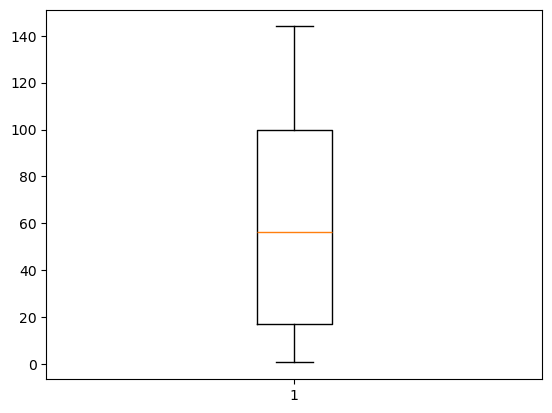

In [33]:
heading_diffs = []
for traj in data["position"]:
    heading_diffs.append(heading_direction_diff(traj, origin=50, end=80, n=10))

plt.figure()
plt.boxplot(np.abs(heading_diffs))
plt.show()

In [3]:
median_obj_id = filtering.filter_by_median_position(df, xlim=[-0.2, 0.2], ylim=[-0.2, 0.2], zlim=[0.1, 0.3])
duration_obj_id = filtering.filter_by_duration(df, threshold=5)

shared_elements = set(median_obj_id) & set(duration_obj_id)
shared_elements

{485, 2214, 2433, 5213, 5536, 6608, 8588, 9409, 9793}

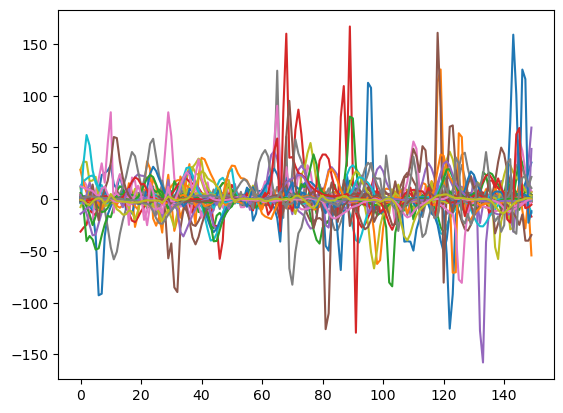

In [4]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

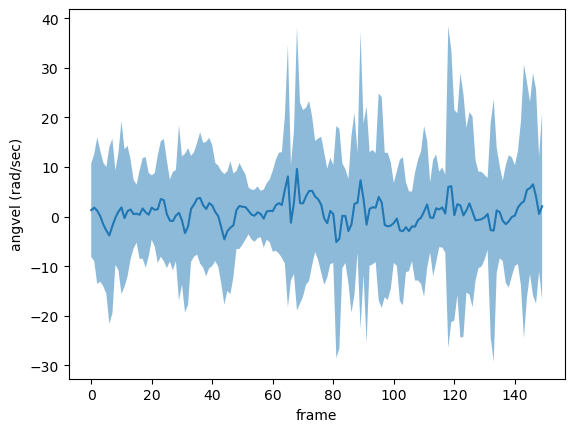

In [5]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

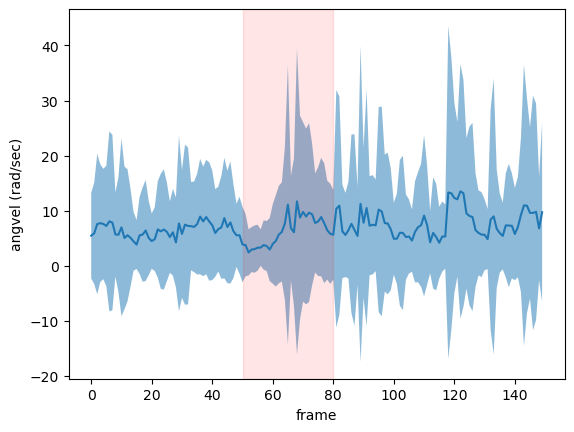

In [15]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.axvspan(50, 80, color='red', alpha=0.1)
plt.show()

<Axes: >

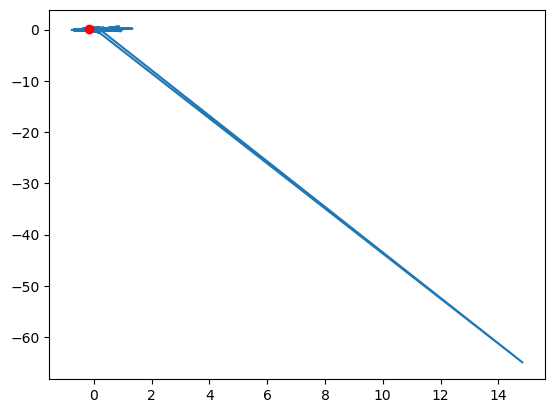

In [10]:
plot_trajectory(df)

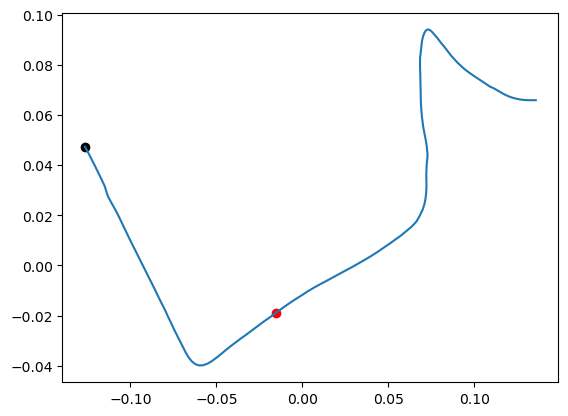

In [13]:
i = 20
traj = data["position"][i]

fig = plt.figure()
plt.plot(traj[:,0], traj[:,1])
plt.scatter(traj[50,0], traj[50,1], color="red")
plt.scatter(traj[0,0], traj[0,1], color="black")
plt.show()